In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,validation_curve,learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import category_encoders
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
#from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import time 
import warnings
warnings.filterwarnings("ignore")

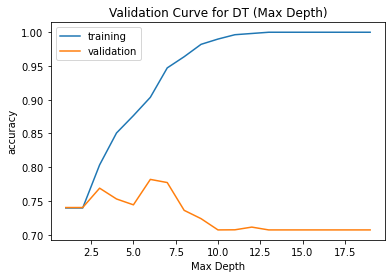

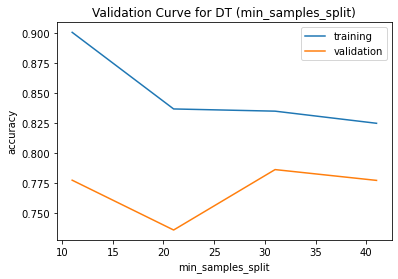

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 101}
0.7736666666666665


"\ndef DT_iteration (md,x_train,y_train,x_test,y_test):\n    DT_gini=DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_depth=md,random_state=1)\n\n    starttime=time.time()\n    DT_gini.fit(x_train,y_train)\n    y_pred=DT_gini.predict(x_test)\n    totaltime=time.time()-starttime\n    DT_time.append(totaltime)\n    DTtest_ac_score.append(accuracy_score(y_test,y_pred))\n    y_train_pred=DT_gini.predict(x_train)\n    DTtrain_ac_score.append(accuracy_score(y_train,y_train_pred))\n    max_dep.append(md)\n\nfor i in list((np.linspace(1,10,10))):\n    DT_iteration(md=i,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)\n\nprint(DTtrain_ac_score)\nprint(DTtest_ac_score)\n"

In [2]:

#Decision Tree
pd.set_option('display.max_rows', None)
data=pd.read_csv('heart.csv')
x=data.drop(['output'],axis=1)
y=data['output']
scale=MinMaxScaler().fit(x)
newx=scale.transform(x)
train_time=[]
accuracyforall=[]

x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.2,random_state=1)


DT= DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_depth=None,random_state=1)
train_score,valscore= validation_curve(DT,x_train,y_train,param_name='max_depth',param_range=np.arange(1,20),cv=10)
plt.figure()
plt.title('Validation Curve for DT (Max Depth)')
plt.xlabel("Max Depth")
plt.ylabel("accuracy")
plt.plot(np.arange(1,20),np.mean(train_score,axis=1),label='training')
plt.plot(np.arange(1,20),np.mean(valscore,axis=1),label='validation')
plt.legend()
plt.show()
DT2= DecisionTreeClassifier(criterion='gini',max_features='sqrt',random_state=1,min_samples_split=None)

train_score2,valscore2= validation_curve(DT2,x_train,y_train,param_name='min_samples_split',param_range=np.arange(1,50,10),cv=10)
plt.figure()
plt.title('Validation Curve for DT (min_samples_split)')
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.plot(np.arange(1,50,10),np.mean(train_score2,axis=1),label='training')
plt.plot(np.arange(1,50,10),np.mean(valscore2,axis=1),label='validation')
plt.legend()
plt.show()

DT_grid={'max_depth':list(range(1,20,5)),
        'max_features':['sqrt','log2'],
        'min_samples_split':list(range(1,200,100)),
        'criterion':['entropy','gini']}
bestparameter=GridSearchCV(DecisionTreeClassifier(random_state=1),DT_grid,scoring='accuracy',cv=10)
bestparameter.fit(x_train,y_train)
print(bestparameter.best_params_)
print(bestparameter.best_score_)


'''
def DT_iteration (md,x_train,y_train,x_test,y_test):
    DT_gini=DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_depth=md,random_state=1)

    starttime=time.time()
    DT_gini.fit(x_train,y_train)
    y_pred=DT_gini.predict(x_test)
    totaltime=time.time()-starttime
    DT_time.append(totaltime)
    DTtest_ac_score.append(accuracy_score(y_test,y_pred))
    y_train_pred=DT_gini.predict(x_train)
    DTtrain_ac_score.append(accuracy_score(y_train,y_train_pred))
    max_dep.append(md)

for i in list((np.linspace(1,10,10))):
    DT_iteration(md=i,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

print(DTtrain_ac_score)
print(DTtest_ac_score)
'''
    

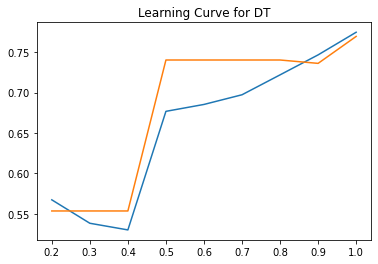

In [3]:
train_size=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
a,b,c= learning_curve(bestparameter,x_train,y_train,train_sizes=train_size,cv=10)
plt.plot(np.array(train_size),np.mean(b,axis=1),label='training')
plt.plot(np.array(train_size),np.mean(c,axis=1),label='validation')
plt.title('Learning Curve for DT')
plt.show()





In [4]:
#finalDT=DecisionTreeClassifier(criterion='entropy',max_depth= 11, max_features='sqrt', min_samples_split=15)

starttime=time.time()
bestparameter.fit(x_train,y_train)
totaltime=time.time()-starttime
train_time.append(totaltime)
y_pred=bestparameter.predict(x_test)
accuracyforall.append(accuracy_score(y_test,y_pred))
print('DT accuracy score is ', str(accuracy_score(y_test,y_pred)))
print('train_time is ' +str(totaltime))

DT accuracy score is  0.7213114754098361
train_time is 0.27575087547302246


{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.8640000000000001


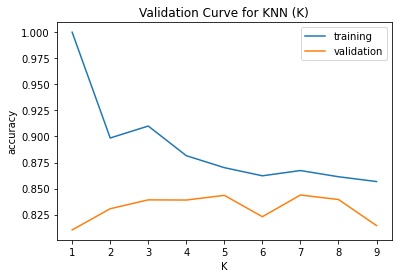

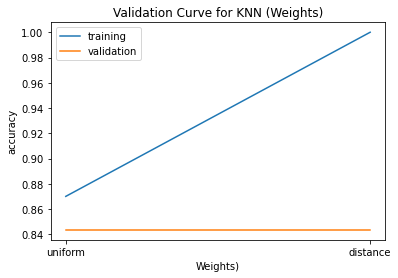

'\nfor i in range(1,15):\n    KN_iteration(k=i,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)\nprint(KNtest_ac_score)\nprint(KNtrain_ac_score)\nprint(KN_time)\n'

In [5]:
#KNN

KNN_grid={'p':list(range(1,20,5)),
        'n_neighbors':list(range(1,10)),
        'p':list(range(1,20,5)),
        'weights':['uniform', 'distance']
        }
bestparameter=GridSearchCV(KNeighborsClassifier(),KNN_grid,scoring='accuracy',cv=10)
bestparameter.fit(x_train,y_train)
print(bestparameter.best_params_)
print(bestparameter.best_score_)
KN= KNeighborsClassifier(n_neighbors=None)
train_score,valscore= validation_curve(KN,x_train,y_train,param_name='n_neighbors',param_range=np.arange(1,10),cv=10)
plt.figure()
plt.title('Validation Curve for KNN (K)')
plt.xlabel("K")
plt.ylabel("accuracy")
plt.plot(np.arange(1,10),np.mean(train_score,axis=1),label='training')
plt.plot(np.arange(1,10),np.mean(valscore,axis=1),label='validation')
plt.legend()
plt.show()
KN2= KNeighborsClassifier(weights=None)


train_score2,valscore2= validation_curve(KN2,x_train,y_train,param_name='weights',param_range=['uniform', 'distance'],cv=10)
plt.figure()
plt.title('Validation Curve for KNN (Weights)')
plt.xlabel("Weights)")
plt.ylabel("accuracy")
plt.plot(['uniform', 'distance'],np.mean(train_score2,axis=1),label='training')
plt.plot(['uniform', 'distance'],np.mean(valscore2,axis=1),label='validation')
plt.legend()
plt.show()


def KN_iteration (k,x_train,y_train,x_test,y_test):
    KNNmodel=KNeighborsClassifier(n_neighbors=k)
    starttime=time.time()
    KNNmodel.fit(x_train,y_train)
    y_pred=KNNmodel.predict(x_test)
    totaltime=time.time()-starttime
    KN_time.append(totaltime)
    KNtest_ac_score.append(accuracy_score(y_test,y_pred))
    y_train_pred=KNNmodel.predict(x_train)
    KNtrain_ac_score.append(accuracy_score(y_train,y_train_pred))
    kn.append(k)

'''
for i in range(1,15):
    KN_iteration(k=i,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)
print(KNtest_ac_score)
print(KNtrain_ac_score)
print(KN_time)
'''

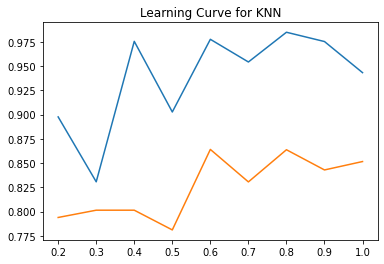

In [6]:
train_size=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
a,b,c= learning_curve(bestparameter,x_train,y_train,train_sizes=train_size,cv=10)
plt.plot(np.array(train_size),np.mean(b,axis=1),label='training')
plt.plot(np.array(train_size),np.mean(c,axis=1),label='validation')
plt.title('Learning Curve for KNN')
plt.show()


In [7]:
starttime=time.time()
bestparameter.fit(x_train,y_train)
totaltime=time.time()-starttime
train_time.append(totaltime)
y_pred=bestparameter.predict(x_test)
accuracyforall.append(accuracy_score(y_test,y_pred))
print('DT accuracy score is ', str(accuracy_score(y_test,y_pred)))
print('train_time is ' +str(totaltime))

DT accuracy score is  0.7049180327868853
train_time is 1.3838930130004883


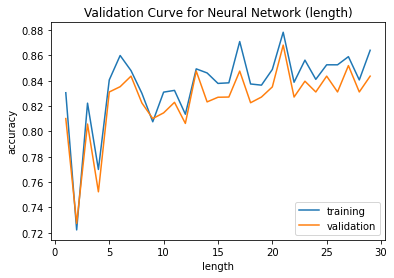

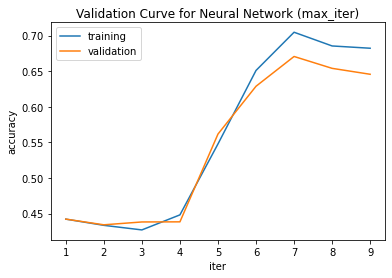

In [8]:
#MLPClassifier

MLP= MLPClassifier(random_state=1)


train_score,valscore= validation_curve(MLP,x_train,y_train,param_name='hidden_layer_sizes',param_range=list(range(1,30)),cv=10)
plt.figure()
plt.title('Validation Curve for Neural Network (length)')
plt.xlabel("length")
plt.ylabel("accuracy")
plt.plot(list(range(1,30)),np.mean(train_score,axis=1),label='training')
plt.plot(list(range(1,30)),np.mean(valscore,axis=1),label='validation')
plt.legend()
plt.show()

MLP2= MLPClassifier(random_state=1)
train_score_2,valscore_2= validation_curve(MLP2,x_train,y_train,param_name='max_iter',param_range=list(range(1,10)),cv=10)
plt.figure()
plt.title('Validation Curve for Neural Network (max_iter)')
plt.xlabel("iter")
plt.ylabel("accuracy")
plt.plot(list(range(1,10)),np.mean(train_score_2,axis=1),label='training')
plt.plot(list(range(1,10)),np.mean(valscore_2,axis=1),label='validation')
plt.legend()
plt.show()




In [9]:

MLP_grid={'solver':['sgd','adam'],
    'alpha':[0.0001,0.05,0.1,1],
     'max_iter':list(range(1,10)),
     'learning_rate':['constant', 'invscaling', 'adaptive']
        }
bestparameter=GridSearchCV(MLPClassifier(random_state=1),MLP_grid,scoring='accuracy',cv=10)
bestparameter.fit(x_train,y_train)
print(bestparameter.best_params_)

starttime=time.time()
bestparameter.fit(x_train,y_train)
totaltime=time.time()-starttime
train_time.append(totaltime)
y_pred=bestparameter.predict(x_test)
accuracyforall.append(accuracy_score(y_test,y_pred))
print('DT accuracy score is ', str(accuracy_score(y_test,y_pred)))
print('train_time is ' +str(totaltime))

{'alpha': 0.0001, 'learning_rate': 'constant', 'max_iter': 7, 'solver': 'adam'}
DT accuracy score is  0.6885245901639344
train_time is 10.288946866989136


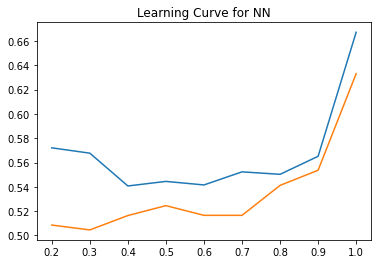

In [10]:
train_size=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
a,b,c= learning_curve(bestparameter,x_train,y_train,train_sizes=train_size,cv=10)
plt.plot(np.array(train_size),np.mean(b,axis=1),label='training')
plt.plot(np.array(train_size),np.mean(c,axis=1),label='validation')
plt.title('Learning Curve for NN')
plt.show()


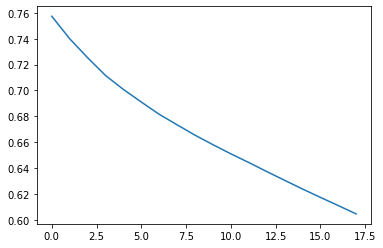

In [11]:
c=MLPClassifier(early_stopping=True,random_state=1)
c.fit(x_train,y_train)
plt.plot(c.loss_curve_)


{'C': 16, 'gamma': 1, 'kernel': 'rbf'}
0.8640000000000001


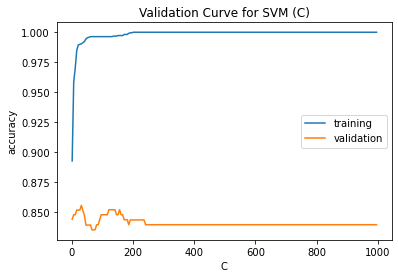

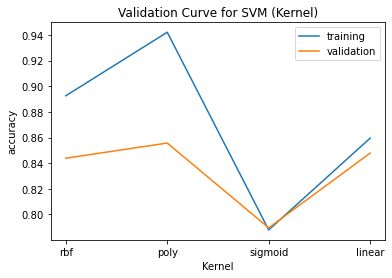

In [12]:
##SVM
Cparameter=[]
SVCtrain_ac_score=[]
SVCtest_ac_score=[]
SVC_time=[]

SVM_grid={'C':list(range(1,20,5)),
        'gamma':[0.001,0.01,0.1,1,2,3],
        'kernel':['rbf','poly','sigmoid']
        
        }

        ##,'poly','sigmoid']
bestparameter=GridSearchCV(SVC(random_state=1),SVM_grid,scoring='accuracy',cv=10)
bestparameter.fit(x_train,y_train)
print(bestparameter.best_params_)
print(bestparameter.best_score_)

SVM= SVC(C=None,random_state=1)
train_score,valscore= validation_curve(SVM,x_train,y_train,param_name='C',param_range=list(range(1,1000,5)),cv=10)
plt.figure()
plt.title('Validation Curve for SVM (C)')
plt.xlabel("C")
plt.ylabel("accuracy")
plt.plot(list(range(1,1000,5)),np.mean(train_score,axis=1),label='training')
plt.plot(list(range(1,1000,5)),np.mean(valscore,axis=1),label='validation')
plt.legend()
plt.show()

SVM2= SVC(kernel=None,random_state=1)
train_score2,valscore2= validation_curve(SVM2,x_train,y_train,param_name='kernel',param_range=['rbf','poly','sigmoid','linear'],cv=10)
plt.figure()
plt.title('Validation Curve for SVM (Kernel)')
plt.xlabel("Kernel")
plt.ylabel("accuracy")
plt.plot(['rbf','poly','sigmoid','linear'],np.mean(train_score2,axis=1),label='training')
plt.plot(['rbf','poly','sigmoid','linear'],np.mean(valscore2,axis=1),label='validation')
plt.legend()
plt.show()





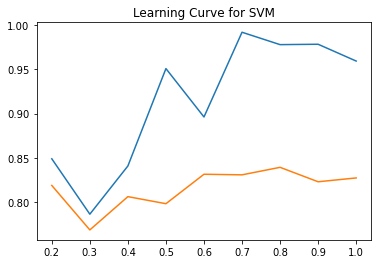

DT accuracy score is  0.7377049180327869
train_time is 6.2345240116119385


In [13]:
train_size=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
a,b,c= learning_curve(bestparameter,x_train,y_train,train_sizes=train_size,cv=10)
plt.plot(np.array(train_size),np.mean(b,axis=1),label='training')
plt.plot(np.array(train_size),np.mean(c,axis=1),label='validation')
plt.title('Learning Curve for SVM')
plt.show()
starttime=time.time()
bestparameter.fit(x_train,y_train)
totaltime=time.time()-starttime
train_time.append(totaltime)
y_pred=bestparameter.predict(x_test)
accuracyforall.append(accuracy_score(y_test,y_pred))
print('DT accuracy score is ', str(accuracy_score(y_test,y_pred)))
print('train_time is ' +str(totaltime))

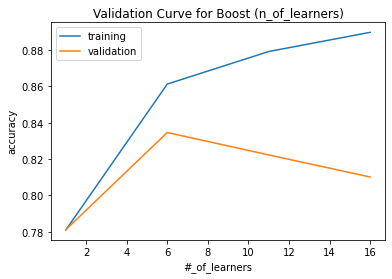

TypeError: __init__() got an unexpected keyword argument 'base_estimator'

In [14]:
#Boosted Decision Tree

Adatrain_ac_score=[]
Adavalidation_ac_score=[]
maxdep=[]
'''
Boost_grid={'n_estimators':list(range(1,1000,5))
        }
bestparameter=GridSearchCV(AdaBoostClassifier(),Boost_grid,scoring='accuracy',cv=10)
bestparameter.fit(x_train,y_train)
print(bestparameter.best_params_)
print(bestparameter.best_score_)
'''
Ada= AdaBoostClassifier(random_state=1)

train_score,valscore= validation_curve(Ada,x_train,y_train,param_name='n_estimators',param_range=list(range(1,20,5)),cv=10)
plt.figure()
plt.title('Validation Curve for Boost (n_of_learners)')
plt.xlabel("#_of_learners")
plt.ylabel("accuracy")
plt.plot(list(range(1,20,5)),np.mean(train_score,axis=1),label='training')
plt.plot(list(range(1,20,5)),np.mean(valscore,axis=1),label='validation')
plt.legend()
plt.show()



'''

Ada2= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10))
train_score,valscore= validation_curve(Ada2,x_train,y_train,param_name='n_estimators',param_range=list(range(1,1000,5)),cv=10)
plt.figure()
plt.title('Validation Curve for Boost (n_of_learners)')
plt.xlabel("#_of_learners")
plt.ylabel("accuracy")
plt.plot(list(range(1,1000,5)),np.mean(train_score,axis=1),label='training')
plt.plot(list(range(1,1000,5)),np.mean(valscore,axis=1),label='validation')
plt.legend()
plt.show()
'''

def ada_iteration (num,x_train,y_train,x_test,y_test):

    adamodel=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=num),n_estimators=1,random_state=1)
    adamodel.fit(x_train,y_train)
    y_train_pred=adamodel.predict(x_train)
    Adatrain_ac_score.append(accuracy_score(y_train,y_train_pred))
    Adavalidation_ac_score.append(cross_val_score(adamodel, x_train, y_train, scoring='accuracy', cv = 10).mean())
    maxdep.append(num)

for i in list((np.linspace(1,20,10,dtype=int))):
    ada_iteration(num=i,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

plt.figure()
plt.title('Validation Curve for Boost (tree pruning)')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.plot(maxdep,Adatrain_ac_score,label='training')
plt.plot(maxdep,Adavalidation_ac_score,label='validation')
plt.legend()
plt.show()

{'n_estimators': 4}
0.8191666666666666
0.7377049180327869


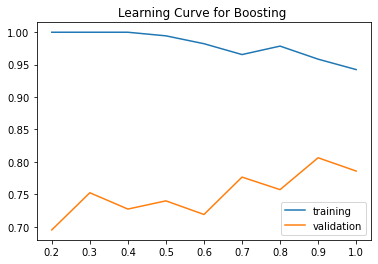

DT accuracy score is  0.7377049180327869
train_time is 0.48081016540527344


In [ ]:


Boost_grid={'n_estimators':[1,2,3,4,5,6,7,8,9,10]
        }
bestparameter=GridSearchCV(AdaBoostClassifier(random_state=1,base_estimator=DecisionTreeClassifier(max_depth=3)),Boost_grid,scoring='accuracy',cv=10)
bestparameter.fit(x_train,y_train)
print(bestparameter.best_params_)
print(bestparameter.best_score_)
finaladamodel=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=4,random_state=1)

finaladamodel.fit(x_train,y_train)
y_train_pred=finaladamodel.predict(x_train)
ypred=finaladamodel.predict(x_test)
print(accuracy_score(y_test,ypred))
train_size=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
a,b,c= learning_curve(finaladamodel,x_train,y_train,train_sizes=train_size,cv=10)
plt.plot(np.array(train_size),np.mean(b,axis=1),label='training')
plt.plot(np.array(train_size),np.mean(c,axis=1),label='validation')
plt.title('Learning Curve for Boosting ')
plt.legend()
plt.show()
starttime=time.time()
bestparameter.fit(x_train,y_train)
totaltime=time.time()-starttime
train_time.append(totaltime)
y_pred=bestparameter.predict(x_test)
accuracyforall.append(accuracy_score(y_test,y_pred))
print('DT accuracy score is ', str(accuracy_score(y_test,y_pred)))
print('train_time is ' +str(totaltime))